In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [10]:
Data=pd.read_csv(r'/content/Passenger cars.csv')

In [11]:
Data.head(10)

Date  Passenger Car
0  1975M01        2640255
1  1975M02        2648909
2  1975M03        2662399
3  1975M04        2674980
4  1975M05        2687314
5  1975M06        2702950
6  1975M07        2711656
7  1975M08        2719059
8  1975M09        2734796
9  1975M10        2748073

Text(0, 0.5, 'Passenger Car')

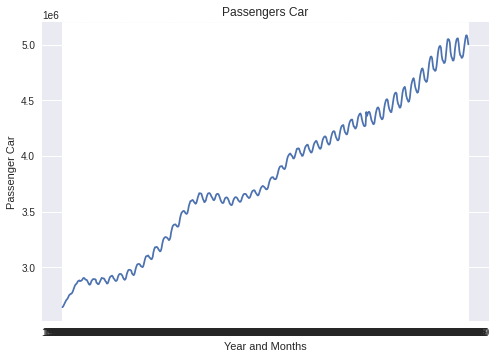

In [12]:
plt.plot(Data["Date"],Data["Passenger Car"])
plt.title('Passengers Car')
plt.xlabel('Year and Months')
plt.ylabel('Passenger Car')

In [13]:
Data['diff_1'] = Data['Passenger Car'].diff()  ##By lag=1
Data['diff_2'] = Data['Passenger Car'].diff(periods=2) ##By lag=2
Data['diff_3'] = Data['Passenger Car'].diff(periods=3) ##By lag=2
Data.head(5)

Date  Passenger Car   diff_1   diff_2   diff_3
0  1975M01        2640255      NaN      NaN      NaN
1  1975M02        2648909   8654.0      NaN      NaN
2  1975M03        2662399  13490.0  22144.0      NaN
3  1975M04        2674980  12581.0  26071.0  34725.0
4  1975M05        2687314  12334.0  24915.0  38405.0

In [14]:
#Drop NaN Values from Newly Generated Dataset
Data_final=Data.dropna()

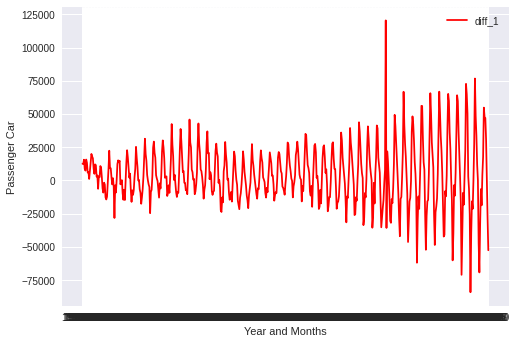

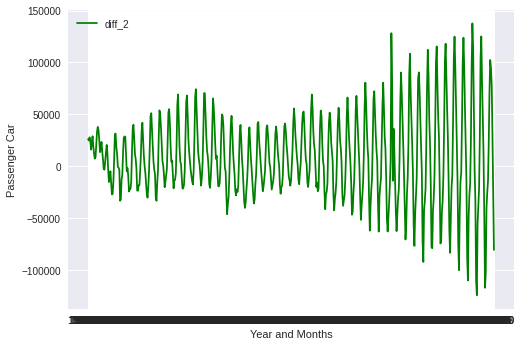

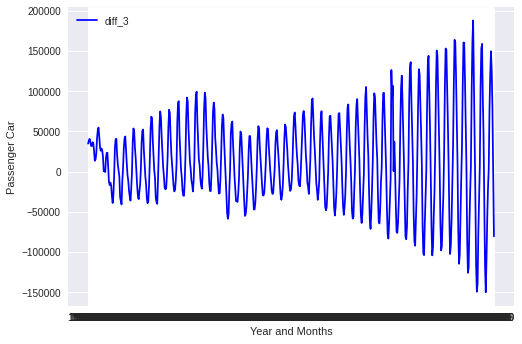

In [15]:
plt.plot(Data_final["Date"],Data_final["diff_1"],color='red',label ='diff_1')
plt.xlabel("Year and Months")
plt.ylabel("Passenger Car")
plt.legend()
plt.show()
plt.plot(Data_final["Date"],Data_final["diff_2"],color='green',label ='diff_2')
plt.xlabel("Year and Months")
plt.ylabel("Passenger Car")
plt.legend()
plt.show()
plt.plot(Data_final["Date"],Data_final["diff_3"],color='blue',label ='diff_3')
plt.xlabel("Year and Months")
plt.ylabel("Passenger Car")
plt.legend()
plt.show()

**Checking the For Stationarity of Time Series Model for Differenced Models.**

In [16]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
values = Data["Passenger Car"].values
res = adfuller(values)
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: 0.756482
p-value: 0.990900
critical values at different levels:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [18]:
values = Data_final["diff_1"].values
res = adfuller(values)
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -3.744805
p-value: 0.003525
critical values at different levels:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [19]:
values = Data_final["diff_2"].values
res = adfuller(values,autolag='AIC')
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -4.282420
p-value: 0.000476
critical values at different levels:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [20]:
values = Data_final["diff_3"].values
res = adfuller(values)
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -4.521524
p-value: 0.000180
critical values at different levels:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

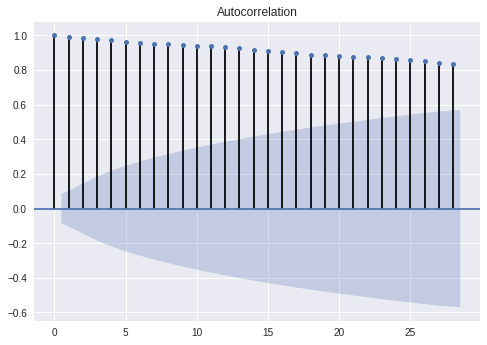

In [22]:
plot_acf(Data["Passenger Car"])
plt.show()

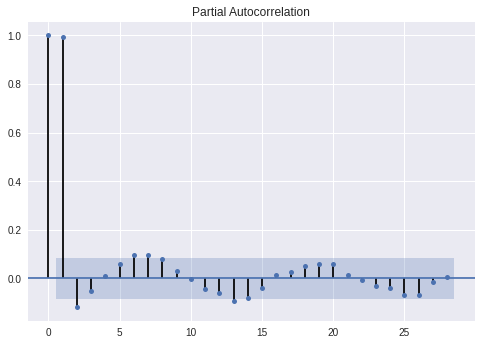

In [23]:
plot_pacf(Data["Passenger Car"])
plt.show()

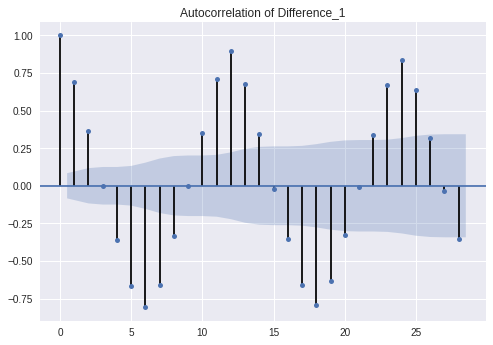

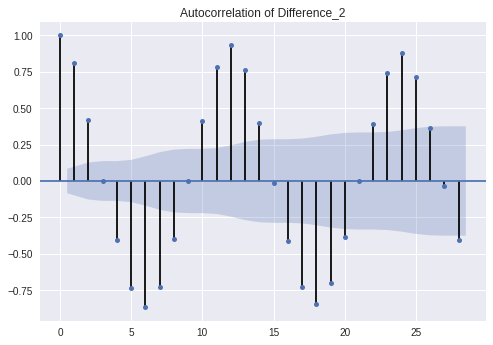

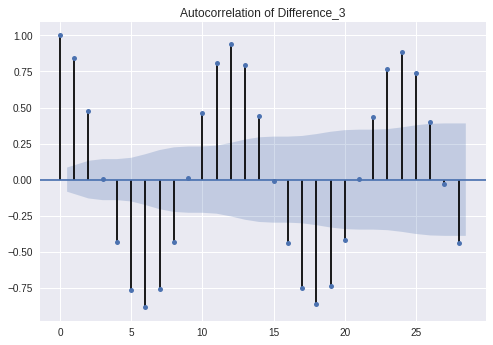

In [24]:
plot_acf(Data_final["diff_1"])
plt.title('Autocorrelation of Difference_1')
plt.show()
plot_acf(Data_final["diff_2"])
plt.title('Autocorrelation of Difference_2')
plt.show()
plot_acf(Data_final["diff_3"])
plt.title('Autocorrelation of Difference_3')
plt.show()

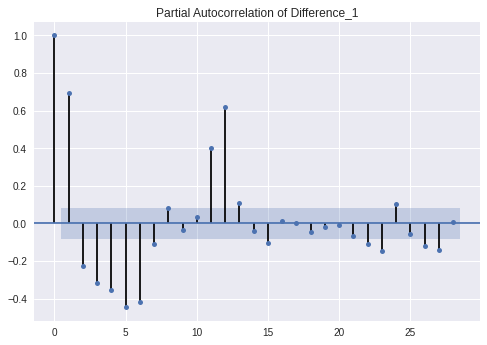

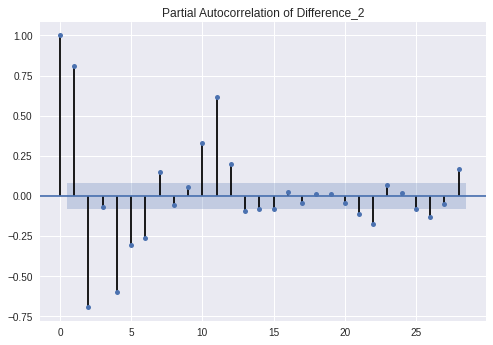

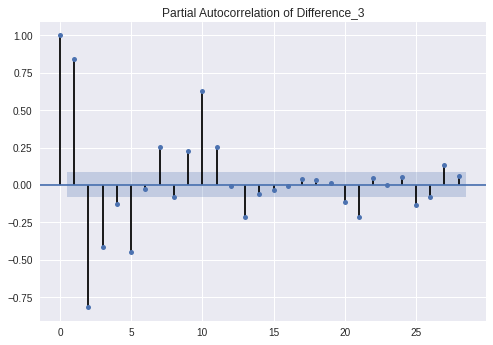

In [41]:
plot_pacf(Data_final["diff_1"])
plt.title('Partial Autocorrelation of Difference_1')
plt.show()
plot_pacf(Data_final["diff_2"])
plt.title('Partial Autocorrelation of Difference_2')
plt.show()
plot_pacf(Data_final["diff_3"])
plt.title('Partial Autocorrelation of Difference_3')
plt.show()

In [25]:
from statsmodels.tsa.arima_model import ARMA

In [35]:
armamodel=ARMA(Data_final['diff_2'], order=(1,1))
ArmaFit=armamodel.fit(disp=False)
predicted=ArmaFit.predict(500,560)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:695: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in subtract
  **kwargs)).imag/2./hess[i, j]
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/kalmanf/kalmanfilt

In [36]:
predicted

500   -64541.660222
501    -7370.209139
502   -16232.258757
503     7995.599492
504    65460.105912
           ...     
556     2287.979537
557     3505.441606
558     4361.936335
559     4964.487525
560     5388.387318
Length: 61, dtype: float64

In [37]:
predicted=pd.DataFrame(predicted)

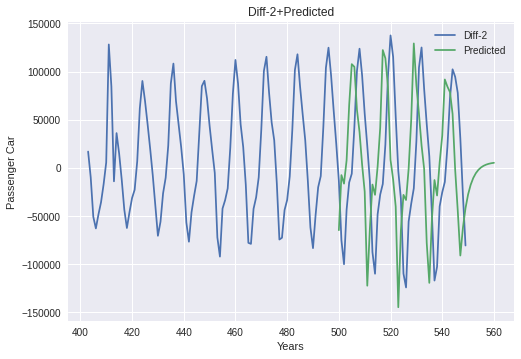

In [42]:
plt.plot(Data_final['diff_2'][400:],label='Diff-2')
plt.plot(predicted,label='Predicted')
plt.xlabel('Years')
plt.ylabel('Passenger Car')
plt.title('Diff-2+Predicted')
plt.legend()
plt.show()

In [49]:
predicted[49:]

0
549 -41751.568633
550 -27476.748144
551 -17434.292773
552 -10369.341592
553  -5399.089463
554  -1902.475602
555    557.421437
556   2287.979537
557   3505.441606
558   4361.936335
559   4964.487525
560   5388.387318